In [5]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from wingstructure.aero.multhop import multhop, _multhop_solve

π = np.pi

# Validation Multhopp Method

## Circulation Distribution

Reference data taken from *H.Schlichting, E.Truckenbrodt-Aerodynamik des Flugzeugs*

TypeError: multhop() got an unexpected keyword argument 'mode'

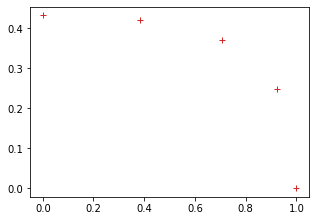

In [7]:
plt.figure(figsize=(5,3.5))

Λ = 6 # aspect ratio of wing
    
b = 15 # m span width
cs = [b/Λ]*2 # depth of wing
ys = [0,b/2] # section positions

αs = [1]*2 # angle of attack
dcls = [2*np.pi]*2

# reference results
ηs_ref = [0,0.3827,0.7071,0.9239,1]
γs_ref = [0.4320,0.4192,0.3710,0.2485,0]

plt.plot(ηs_ref, γs_ref, 'C3+', label='reference')

# coarse calculation
M = 7

res = multhop(αs, cs, ys, dcls, M = M, mode='gamma')
res2 = multhop(αs, cs, ys, dcls, M = M, mode='combined')
res3 = multhop(αs, cs, ys, dcls, M = 91, mode='combined')
res4 = multhop(αs, cs, ys, dcls, M = 191, mode='combined')

plt.plot(res[0][M//2:]/b*2, res[1][M//2:], 'C1', label='present(coarse)')


# finer calculation
M = 91

res5 = multhop(αs, cs, ys, dcls, M = M, mode='gamma')

plt.plot(res5[0][M//2:]/b*2, res5[1][M//2:], 'C2--', label='present(fine)')

# layout
plt.xlabel('η')
plt.ylabel('γ')
plt.grid()
plt.legend(loc='best');

plt.savefig('validation_multhopp.pdf', bbox_inches='tight')

In [3]:
if np.isclose(res[0][7//2:]/(b/2), ηs_ref[:-1], atol=1e-4).all():
    print('Circulation is correct!')

Circulation is correct!
